# ConvNets


In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

import keras

from keras.preprocessing.image import ImageDataGenerator

from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPooling2D, Flatten, Reshape
from keras.optimizers import SGD, RMSprop 
from keras.datasets import fashion_mnist # data set
# feel free to import whatever else you may need from keras..


# print(dir(keras.layers))

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Fashion-MNIST using ConvNets

- Load the Fashion-MNIST dataset used in Ex.11.
- Design and implement a convoulutional network to classify the datasets.
- Train and test your network
- Plot the results (as in Ex.11)

Can you get better results than the fully-connected network from Ex.11 ?


(60000, 28, 28)
(60000,)


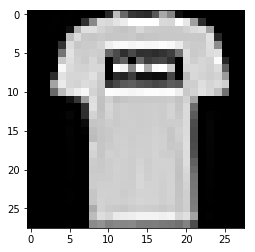

(60000, 28, 28, 1)
(60000, 10)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 6)         60        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 16)        880       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 16)          2320      
_________________________________________________________________
flatten_1 (Flatten)          (None, 144)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 84)      

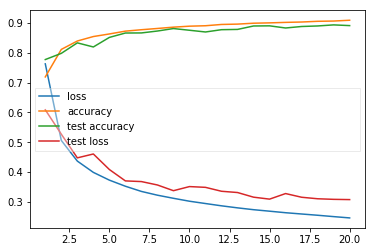

final :
loss = 0.3075047049999237  , accuracy = 0.8913


In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print(x_train.shape)
print(y_train.shape)

plt.imshow(x_train[1,:],'gray');
plt.show()

x_train = (x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1).astype(np.float32)) / 255
x_test = (x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1).astype(np.float32)) / 255

y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

print(x_train.shape)
print(y_train.shape)




model = Sequential()

# The first set of CONV => RELU => POOL layers
model.add(Conv2D(6, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# The second set of CONV => RELU => POOL layers
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16, (3, 3), activation='relu'))

# The set of FC => RELU layers
model.add(Flatten())
model.add(Dense(84, activation='relu'))
# The softmax classifier
model.add(Dense(10, activation='softmax'))
model.summary()
print('\n\n')

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


fr = model.fit(x_train, y_train,
          epochs=20,
          batch_size=128,
            validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, batch_size=128)

x_epochs = list(range(1, 20 + 1))
print(fr.history.keys())
y_loss = fr.history['loss']
y_acc = fr.history['acc']
test_loss = fr.history['val_loss']
test_acc = fr.history['val_acc']

plt.plot(x_epochs, y_loss, label = 'loss')
plt.plot(x_epochs, y_acc, label = 'accuracy')
plt.plot(x_epochs, test_acc, label = 'test accuracy')
plt.plot(x_epochs, test_loss, label = 'test loss')

leg = plt.legend(loc='best', ncol=1, mode="expand", shadow=False, fancybox=False)
leg.get_frame().set_alpha(0.4)

plt.show()

print('final :\nloss =', score[0], ' , accuracy =', score[1])

# the results are a little bit better than ex11

### Cats vs Dogs

Based on the famous Kaggle competetion: https://www.kaggle.com/c/dogs-vs-cats/

- Download the small dataset (300 cats and 300 dogs. The full dataset in kaggle has 125,000 images..).
- Preprocess the images: resize to 224x244 and normalize values to [0.0 - 1.0]
- Design and implement a convoulutional network to classify cats vs dogs
- Train and test your network
- Plot the results

What is the maximal test accuracy you achieved?


Found 500 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 6)       60        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 111, 111, 6)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 109, 109, 16)      880       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 54, 54, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 52, 52, 16)        2320      
_________________________________________________________________
flatten_2 (Flatten)          (None, 43264)             0         
____________________________________________________________

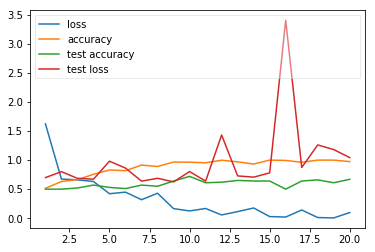

final :
loss = 1.0425139558315277  , accuracy = 0.67


In [4]:
train_path = 'cats-and-dogs/train' # fill the path to the train data (with 'cat' and 'dog' subfolders)
test_path = 'cats-and-dogs/test'

train_batches = ImageDataGenerator(rescale=1./255).flow_from_directory(train_path, 
                                                                       target_size=(224,224), 
                                                                       classes=['dog', 'cat'], 
                                                                       batch_size=32,
                                                                      color_mode = 'grayscale')


test_batches = ImageDataGenerator(rescale=1./255).flow_from_directory(test_path, 
                                                                       target_size=(224,224), 
                                                                       classes=['dog', 'cat'], 
                                                                       batch_size=32,
                                                                      color_mode = 'grayscale')


# imgs_train, labels_train = train_batches # each time you call next() you get the next batch of images
# imgs_test, labels_test = test_batches


model = Sequential()

# The first set of CONV => RELU => POOL layers
model.add(Conv2D(6, (3, 3), input_shape=(224, 224, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# The second set of CONV => RELU => POOL layers
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16, (3, 3), activation='relu'))

# The set of FC => RELU layers
model.add(Flatten())
model.add(Dense(84, activation='relu'))
# The softmax classifier
model.add(Dense(2, activation='softmax'))
model.summary()
print('\n\n')

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


fr = model.fit_generator(train_batches,
          epochs=20,
          validation_data=test_batches)
score = model.evaluate_generator(test_batches)

x_epochs = list(range(1, 20 + 1))
y_loss = fr.history['loss']
y_acc = fr.history['acc']
test_loss = fr.history['val_loss']
test_acc = fr.history['val_acc']

plt.plot(x_epochs, y_loss, label = 'loss')
plt.plot(x_epochs, y_acc, label = 'accuracy')
plt.plot(x_epochs, test_acc, label = 'test accuracy')
plt.plot(x_epochs, test_loss, label = 'test loss')

leg = plt.legend(loc='best', ncol=1, mode="expand", shadow=False, fancybox=False)
leg.get_frame().set_alpha(0.4)

plt.show()
print('final :\nloss =', score[0], ' , accuracy =', score[1])

# max accuracy on test set 0.7200

### Transfer learning (using VGG-16)

- Load the pre-trained VGG16 model. 
- Freeze all the paramers of the model (by setting the `trainable` field in each layer to  `false`).
- Remove the last layer from the model, and replace it by a suitable output layer (with two outputs: for 'cat' and 'dog').
- Train and test the network (only the last layer parameters)
- Plot the results

What is the maximal test accuracy you achieved?


In [5]:
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential, Model
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras import backend as k
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
import matplotlib.pyplot as plt

img_width, img_height = 224, 224
train_data_dir = "cats-and-dogs/train"
validation_data_dir = "cats-and-dogs/test"
nb_train_samples = 128
nb_validation_samples = 32
batch_size = 16
epochs = 20

model = applications.VGG16(weights="imagenet", include_top=False, input_shape=(img_width, img_height, 3))

# Freeze the layers which you don't want to train. Here I am freezing the first 5 layers.
for layer in model.layers:
    layer.trainable = False

# Adding custom Layers
x = model.output
x = Flatten()(x)
# x = Dense(1024, activation="relu")(x)
x = Dropout(0.5)(x)
# x = Dense(1024, activation="relu")(x)
predictions = Dense(2, activation="softmax")(x)

# creating the final model
model_final = Model(inputs=model.input, outputs=predictions)

# compile the model
model_final.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])
model_final.summary()
print('\n\n')

# Initiate the train and test generators with data Augumentation
train_datagen = ImageDataGenerator(
    rescale=1. / 255)

test_datagen = ImageDataGenerator(
    rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical")

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    class_mode="categorical")

# Save the model according to the conditions
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False,
                             mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=10, verbose=1, mode='auto')

# Train the model
fr = model_final.fit_generator(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples,
    callbacks=[checkpoint, early])

score = model.evaluate_generator(validation_generator)

x_epochs = list(range(1, epochs + 1))
y_loss = fr.history['loss']
y_acc = fr.history['acc']
test_loss = fr.history['val_loss']
test_acc = fr.history['val_acc']

plt.plot(x_epochs, y_loss, label='loss')
plt.plot(x_epochs, y_acc, label='accuracy')
plt.plot(x_epochs, test_acc, label='test accuracy')
plt.plot(x_epochs, test_loss, label='test loss')

leg = plt.legend(loc='best', ncol=1, mode="expand", shadow=False, fancybox=False)
leg.get_frame().set_alpha(0.4)

plt.show()
print('final :\nloss =', score[0], ' , accuracy =', score[1])

# max accuracy on test set 0.7200
# epoch took about 10 minutes

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

KeyboardInterrupt: 

## Good Luck!